Model Accuracies:
Random Forest: 85.45%
Decision Tree: 78.50%
Logistic Regression: 81.10%

Best Model:
Random Forest with 85.45% accuracy

Classification Reports:
Random Forest:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1607
           1       0.70      0.45      0.55       393

    accuracy                           0.85      2000
   macro avg       0.79      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000

Decision Tree:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1607
           1       0.46      0.50      0.48       393

    accuracy                           0.79      2000
   macro avg       0.67      0.68      0.67      2000
weighted avg       0.79      0.79      0.79      2000

Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55

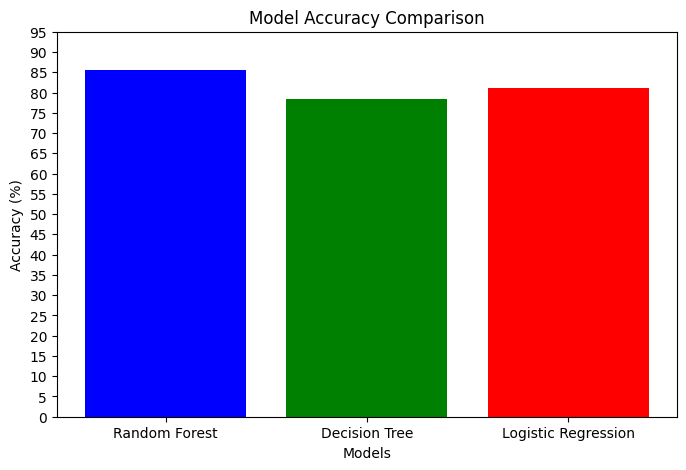

In [ ]:
import numpy as np
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import joblib

warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv('C:\\Users\\abhij\\Desktop\\ML Model\\Bank.csv')

# Preprocess the data
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces in column names
df = df.drop(columns=['customer_id'])  # Drop irrelevant columns

# Convert categorical variables
df = pd.get_dummies(df, columns=['country'], drop_first=True)

# Encode the 'gender' column
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])  # Male: 1, Female: 0

# Separate features (X) and target (y)
X = df.drop(columns=['churn'])  # 'churn' is the target variable
y = df['churn']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

# Train and evaluate multiple models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=10, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42)
}

accuracies = {}
classification_reports = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    accuracies[model_name] = acc * 100
    classification_reports[model_name] = classification_report(y_test, predictions)

# Select the best model
best_model_name = max(accuracies, key=accuracies.get)
best_model_accuracy = accuracies[best_model_name]

# Save the best model and preprocessing objects
joblib.dump(models[best_model_name], "C:/Users/abhij/Desktop/ML Model/model.pkl")
joblib.dump(scaler, "C:/Users/abhij/Desktop/ML Model/scaler.pkl")
joblib.dump(le, "C:/Users/abhij/Desktop/ML Model/label_encoder.pkl")

# Display results
print("Model Accuracies:")
for model_name, acc in accuracies.items():
    print(f"{model_name}: {acc:.2f}%")

print("\nBest Model:")
print(f"{best_model_name} with {best_model_accuracy:.2f}% accuracy")

print("\nClassification Reports:")
for model_name, report in classification_reports.items():
    print(f"{model_name}:\n{report}")

# Visualize the accuracies
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.ylim([0, 1])
plt.yticks(np.arange(0, 100, 5))
plt.show()
